In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches

import sys
sys.path.insert(1, 'code')
from help_funcs import *
pvcolor = (0.0, 0.4039, 0.7059)
sstcolor = (0.898,0.6314,0.0039)
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

## Slope change histograms

In [41]:
# Computes slope changes for PV and SST stim conditions for given sim condition.
# Repeat this script for each desired condition by replacing 'simname'

simname = 'base_a0.07_pf0.8'
workdir = 'work_dir'
output_file_name = 'compiled_data/histograms_Excitatory_a70_p0.8.mat'
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])

slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []
binlen = 200  # ms time window from which spikes are counted
seedlist = np.arange(1, 101)  # RNG seeds used
nseeds = len(seedlist)

ctrl_pv_ave = np.zeros(5)
stim_pv_ave = np.zeros(5)
ctrl_sst_ave = np.zeros(5)
stim_sst_ave = np.zeros(5)

parameter_fits = []
save_mat_file = False

for seed in seedlist:
    ctrl_pv_curve = [[] for i in range(4)]
    stim_pv_curve = [[] for i in range(4)]
    ctrl_sst_curve = [[] for i in range(4)]
    stim_sst_curve = [[] for i in range(4)]

    ctrl_pv_curve_e = [[] for i in range(4)]
    stim_pv_curve_e = [[] for i in range(4)]
    ctrl_sst_curve_e = [[] for i in range(4)]
    stim_sst_curve_e = [[] for i in range(4)]

    
    folder = '%s/%s/results_%s/'%(workdir,simname, seed)
    not_all_found=False
    for ci, cont in enumerate(contrasts):
        try:
            with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                all_spikes = pickle.load(f)
            with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                all_positions = pickle.load(f)
        except FileNotFoundError:
            not_all_found = True
            break

        ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans_v2(all_spikes[:8000], all_positions[:8000], binlen=binlen)
        ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans_v2(all_spikes[8000:9000], all_positions[8000:9000], binlen=binlen)
        ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans_v2(all_spikes[9000:10000], all_positions[9000:10000], binlen=binlen)
        ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans_v2(all_spikes, all_positions, binlen=binlen)

        ctrl_pv_curve[0].append(ctrlpv_E_mean)
        ctrl_pv_curve[1].append(ctrlpv_P_mean)
        ctrl_pv_curve[2].append(ctrlpv_S_mean)
        ctrl_pv_curve[3].append(ctrlpv_A_mean)
        ctrl_pv_curve_e[0].append(ctrlpv_E_err)
        ctrl_pv_curve_e[1].append(ctrlpv_P_err)
        ctrl_pv_curve_e[2].append(ctrlpv_S_err)
        ctrl_pv_curve_e[3].append(ctrlpv_A_err)

        stim_pv_curve[0].append(stimpv_E_mean)
        stim_pv_curve[1].append(stimpv_P_mean)
        stim_pv_curve[2].append(stimpv_S_mean)
        stim_pv_curve[3].append(stimpv_A_mean)
        stim_pv_curve_e[0].append(stimpv_E_err)
        stim_pv_curve_e[1].append(stimpv_P_err)
        stim_pv_curve_e[2].append(stimpv_S_err)
        stim_pv_curve_e[3].append(stimpv_A_err)
        

        try:
            with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                all_spikes = pickle.load(f)
            with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                all_positions = pickle.load(f)
        except FileNotFoundError:
            not_all_found = True
            break

        ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans_v2(all_spikes[:8000], all_positions[:8000], binlen= binlen)
        ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans_v2(all_spikes[8000:9000], all_positions[8000:9000], binlen= binlen)
        ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans_v2(all_spikes[9000:10000], all_positions[9000:10000], binlen= binlen)
        ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans_v2(all_spikes, all_positions, binlen= binlen)


        ctrl_sst_curve[0].append(ctrlsst_E_mean)
        ctrl_sst_curve[1].append(ctrlsst_P_mean)
        ctrl_sst_curve[2].append(ctrlsst_S_mean)
        ctrl_sst_curve[3].append(ctrlsst_A_mean)
        ctrl_sst_curve_e[0].append(ctrlsst_E_err)
        ctrl_sst_curve_e[1].append(ctrlsst_P_err)
        ctrl_sst_curve_e[2].append(ctrlsst_S_err)
        ctrl_sst_curve_e[3].append(ctrlsst_A_err)

        stim_sst_curve[0].append(stimsst_E_mean)
        stim_sst_curve[1].append(stimsst_P_mean)
        stim_sst_curve[2].append(stimsst_S_mean)
        stim_sst_curve[3].append(stimsst_A_mean)
        stim_sst_curve_e[0].append(stimsst_E_err)
        stim_sst_curve_e[1].append(stimsst_P_err)
        stim_sst_curve_e[2].append(stimsst_S_err)
        stim_sst_curve_e[3].append(stimsst_A_err)
    # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])
    
        ctrl_pv_ave[ci] += ctrlpv_E_mean
        stim_pv_ave[ci] += stimpv_E_mean
        ctrl_sst_ave[ci] += ctrlsst_E_mean
        stim_sst_ave[ci] += stimsst_E_mean
    
    if not_all_found:
        continue
#     continue
        
    params, cov = fit_naka_rushton(contrasts[:], ctrl_pv_curve[0][:], sigma=ctrl_pv_curve_e[0][:])
    m_cp, C_cp, n_cp, k_cp = params
    m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
    slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)
    
    params, cov = fit_naka_rushton(contrasts[:], stim_pv_curve[0][:], sigma=stim_pv_curve_e[0][:])
    m_sp, C_sp, n_sp, k_sp = params
    m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
    slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)
    
    params, cov = fit_naka_rushton(contrasts[:], ctrl_sst_curve[0][:], sigma=ctrl_sst_curve_e[0][:])
    m_cs, C_cs, n_cs, k_cs = params
    m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
    slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)
    
    params, cov = fit_naka_rushton(contrasts[:], stim_sst_curve[0][:], sigma=stim_sst_curve_e[0][:])
    m_ss, C_ss, n_ss, k_ss = params
    m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
    slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)
    
    
    slopes_cp.append(slope_cp)
    slopes_sp.append(slope_sp)
    slopes_cs.append(slope_cs)
    slopes_ss.append(slope_ss)
    
MI_PV = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_sp, slopes_cp)]
MI_SST = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_ss, slopes_cs)]


if save_mat_file:
    data = dict()
    data['PV_control_slope'] = slopes_cp
    data['PV_stim_slope'] = slopes_sp
    data['SST_control_slope'] = slopes_cs
    data['SST_stim_slope'] = slopes_ss

In [14]:
# Retrieve pre-compiled data
import scipy.io
data = scipy.io.loadmat('compiled_data/histograms_Excitatory_a70_p0.0.mat')
slopes_cp, slopes_sp, slopes_cs, slopes_ss = data['PV_control_slope'], data['PV_stim_slope'], data['SST_control_slope'], data['SST_stim_slope']
MI_PV = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_sp, slopes_cp)]
MI_SST = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_ss, slopes_cs)]

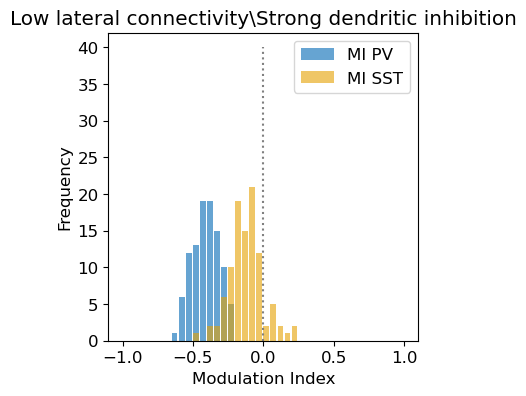

In [15]:
plt.figure(figsize=(4, 4))
plt.hist(MI_PV, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=pvcolor, label='MI PV', edgecolor='none')
plt.hist(MI_SST, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=sstcolor, label='MI SST', edgecolor='none')
plt.plot([0,0],[0,40],':', c='gray')

# Adding labels and legend
plt.xlabel('Modulation Index')
plt.ylabel('Frequency')
plt.title('Low lateral connectivity\Strong dendritic inhibition')
plt.legend()

# Display the plot
plt.show()

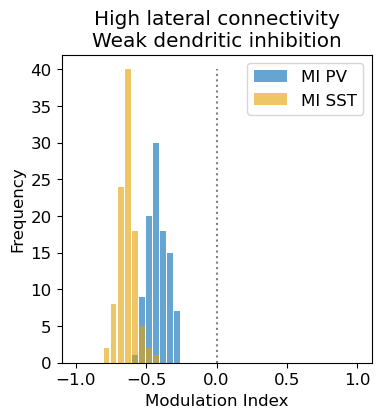

In [12]:
plt.figure(figsize=(4, 4))
plt.hist(MI_PV, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=pvcolor, label='MI PV', edgecolor='none')
plt.hist(MI_SST, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=sstcolor, label='MI SST', edgecolor='none')
plt.plot([0,0],[0,40],':', c='gray')

# Adding labels and legend
plt.xlabel('Modulation Index')
plt.ylabel('Frequency')
plt.title('High lateral connectivity\nWeak dendritic inhibition')
plt.legend()

# Display the plot
plt.show()

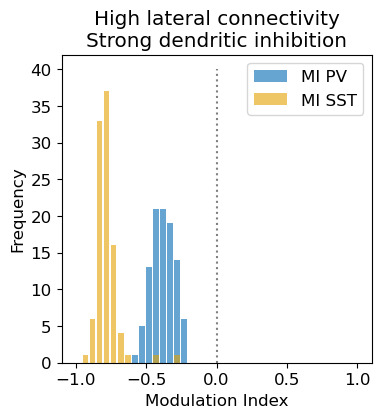

In [3]:
plt.figure(figsize=(4, 4))
plt.hist(MI_PV, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=pvcolor, label='MI PV', edgecolor='none')
plt.hist(MI_SST, bins=np.linspace(-1,1,41), width=0.04, alpha=0.6, color=sstcolor, label='MI SST', edgecolor='none')
plt.plot([0,0],[0,40],':', c='gray')

# Adding labels and legend
plt.xlabel('Modulation Index')
plt.ylabel('Frequency')
plt.title('High lateral connectivity\nStrong dendritic inhibition')
plt.legend()

# Display the plot
plt.show()

## Heatmaps (Figs. 5B, C)

In [ ]:
# Computes slope changes for PV and SST stim conditions for given sim condition.
# Repeat this script for each desired condition by replacing 'simname'


workdir = 'work_dir'
output_file_name = 'compiled_data/Exc_heatmaps.mat'
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])

pf_values = np.array([0.1*i for i in range(9)])
alpha_values = np.array([0.04+0.002*i for i in range(1,41)])

PV_slope_MI = np.zeros([len(pf_values), len(alpha_values)])
SST_slope_MI = np.zeros([len(pf_values), len(alpha_values)])
PV_slope_MAD = np.zeros([len(pf_values), len(alpha_values)])
SST_slope_MAD = np.zeros([len(pf_values), len(alpha_values)])

for pf in pf_values:
    for alpha in alpha_values:
        
        simname = f'base_a{alpha}_pf{pf}'

        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []
        binlen = 200  # ms time window from which spikes are counted
        seedlist = np.arange(1, 31)  # RNG seeds used
        nseeds = len(seedlist)

        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)

        parameter_fits = []
        save_mat_file = False

        for seed in seedlist:
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = '%s/%s/results_%s/'%(workdir,simname, seed)
            not_all_found=False
            for ci, cont in enumerate(contrasts):
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans_v2(all_spikes[:8000], all_positions[:8000], binlen=binlen)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans_v2(all_spikes[8000:9000], all_positions[8000:9000], binlen=binlen)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans_v2(all_spikes[9000:10000], all_positions[9000:10000], binlen=binlen)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans_v2(all_spikes, all_positions, binlen=binlen)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans_v2(all_spikes[:8000], all_positions[:8000], binlen= binlen)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans_v2(all_spikes[8000:9000], all_positions[8000:9000], binlen= binlen)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans_v2(all_spikes[9000:10000], all_positions[9000:10000], binlen= binlen)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans_v2(all_spikes, all_positions, binlen= binlen)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])

                ctrl_pv_ave[ci] += ctrlpv_E_mean
                stim_pv_ave[ci] += stimpv_E_mean
                ctrl_sst_ave[ci] += ctrlsst_E_mean
                stim_sst_ave[ci] += stimsst_E_mean

            if not_all_found:
                continue
        #     continue

            params, cov = fit_naka_rushton(contrasts[:], ctrl_pv_curve[0][:], sigma=ctrl_pv_curve_e[0][:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)

            params, cov = fit_naka_rushton(contrasts[:], stim_pv_curve[0][:], sigma=stim_pv_curve_e[0][:])
            m_sp, C_sp, n_sp, k_sp = params
            m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)

            params, cov = fit_naka_rushton(contrasts[:], ctrl_sst_curve[0][:], sigma=ctrl_sst_curve_e[0][:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            params, cov = fit_naka_rushton(contrasts[:], stim_sst_curve[0][:], sigma=stim_sst_curve_e[0][:])
            m_ss, C_ss, n_ss, k_ss = params
            m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
            slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)

        MI_PV = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_sp, slopes_cp)]
        MI_SST = [(sp - cp) / (sp + cp) for sp, cp in zip(slopes_ss, slopes_cs)]

        PV_slope_MI[pf_i, alpha_i] = np.median(MI_PV)
        SST_slope_MI[pf_i, alpha_i] = np.median(MI_SST)
        PV_slope_MAD[pf_i, alpha_i] = np.median(np.abs(MI_PV - PV_slope_MI[pf_i, alpha_i]))
        SST_slope_MAD[pf_i, alpha_i] = np.median(np.abs(MI_SST - SST_slope_MI[pf_i, alpha_i]))
        

if save_mat_file:
    data = dict()
    data['PV_slope_MI'] = PV_slope_MI
    data['PV_slope_MAD'] = PV_slope_MAD
    data['SST_slope_MI'] = SST_slope_MI
    data['SST_slope_MAD'] = SST_slope_MAD

In [16]:
# Load precompiled data
import scipy.io
data = scipy.io.loadmat('compiled_data/Exc_heatmaps.mat')

Text(0, 0.5, 'p_far SST')

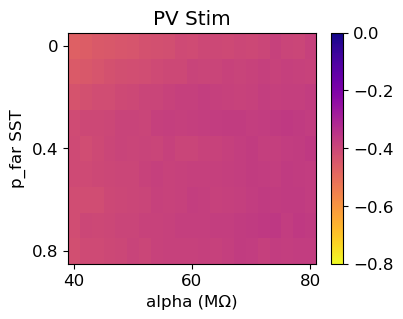

In [17]:
plt.figure(figsize=(4,3))
plt.imshow(data['PV_slope_MI'], cmap='plasma_r', aspect='auto', vmin=-0.8, vmax = 0)
plt.colorbar()
plt.title('PV Stim')

plt.xticks(ticks=[0,10, 20], labels=[40, 60, 80])
plt.yticks(ticks=[0,4, 8], labels=[0, 0.4, 0.8])
plt.xlabel('alpha (MΩ)')
plt.ylabel('p_far SST')

Text(0, 0.5, 'p_far SST')

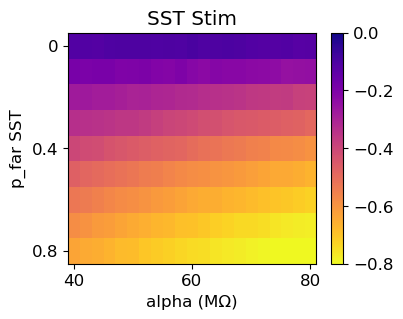

In [18]:
plt.figure(figsize=(4,3))
plt.imshow(data['SST_slope_MI'], cmap='plasma_r', aspect='auto', vmin=-0.8, vmax = 0)
plt.colorbar()
plt.title('SST Stim')

plt.xticks(ticks=[0,10, 20], labels=[40, 60, 80])
plt.yticks(ticks=[0,4, 8], labels=[0, 0.4, 0.8])
plt.xlabel('alpha (MΩ)')
plt.ylabel('p_far SST')